<a href="https://colab.research.google.com/github/dudungE/AI_Finance/blob/master/9%EC%9E%A5_%EC%A3%BC%EA%B0%80%EB%94%A5%EB%9F%AC%EB%8B%9D_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 활성화함수



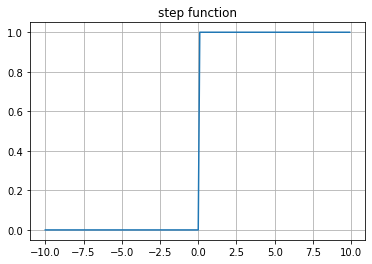

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def stepfunc(x):
    return np.where(x <= 0, 0, 1)

x = np.arange(-10, 10, 0.1)
y = stepfunc(x)

plt.plot(x, y)
plt.title('step function')
plt.grid(True)
plt.show()

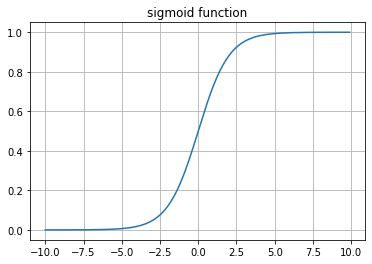

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 

x = np.arange(-10, 10, 0.1)
y = sigmoid(x) 

plt.plot(x, y)
plt.title('sigmoid function')
plt.grid(True)
plt.show()

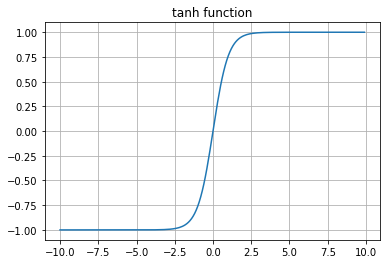

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))  

x = np.arange(-10, 10, 0.1) 
y = tanh(x) 

plt.plot(x, y)
plt.title('tanh function')
plt.grid(True)
plt.show()

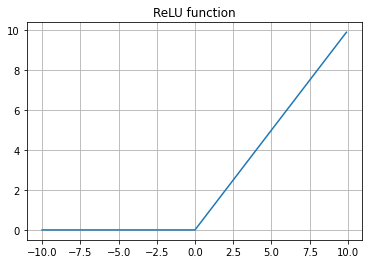

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-10, 10, 0.1)
y = relu(x)

plt.plot(x, y)
plt.title('ReLU function')
plt.grid(True)
plt.show()

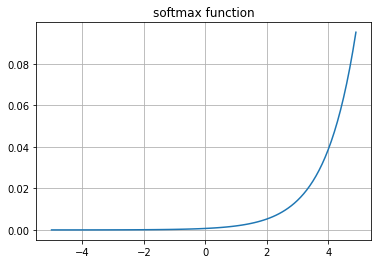


 [0.21194156 0.21194156 0.57611688]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

x = np.arange(-5, 5, 0.1)
y = softmax(x)

plt.plot(x, y)
plt.title('softmax function')
plt.grid(True)
plt.show()

print('\n',softmax([1,1,2]))

# 다층 퍼셉트론 구현
## 순전파

In [ ]:
import numpy as np

# 입력층 -> 은닉층(1층)
X = np.array([10, 20])  
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # weight 2x3개
B1 = np.array([1, 2, 3])                           # bias 3개

def sigmoid(x):                                    # 활성화 함수
    return 1 / (1 + np.exp(-x))

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

print('A1 :', A1)  # 입력신호
print('Z1 :', Z1)  # 출력신호

A1 : [ 6. 13. 20.]
Z1 : [0.99752738 0.99999774 1.        ]


In [ ]:
# 은닉층(1층) -> 출력층(2층)
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # weight 3x2개
B2 = np.array([0.1, 0.2])                            # bias 2개

A2 = np.dot(Z1, W2) + B2    # Z1 : [0.99752738 0.99999774 1.]
Y = sigmoid(A2) 

print('A2 :', A2)
print('Y  :', Y)

A2 : [0.69975229 1.69900982]
Y  : [0.66813285 0.84540537]


# 선형 회귀 모델 학습 과정 
## 오차역전파

step|    w|    b| cost
----|-----|-----|-----
   1| 1.80| 0.65| 9.29


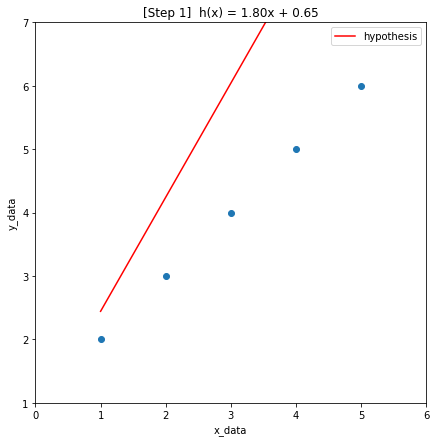

   3| 1.53| 0.57| 3.19


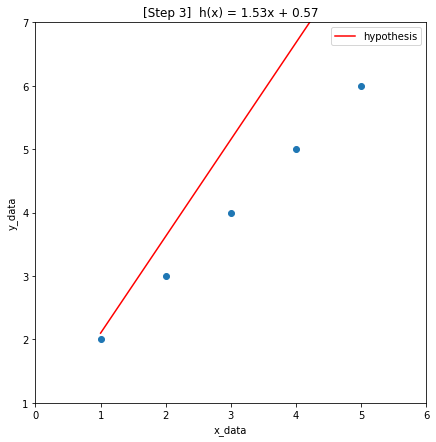

   5| 1.37| 0.53| 1.12


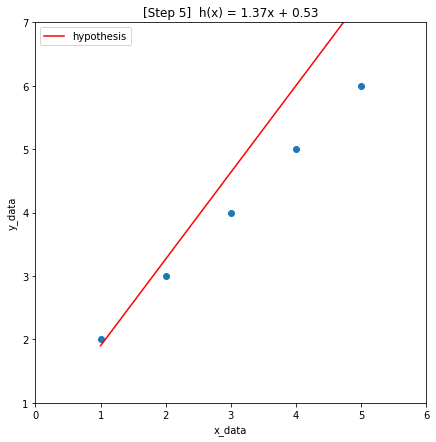

  10| 1.20| 0.50| 0.12


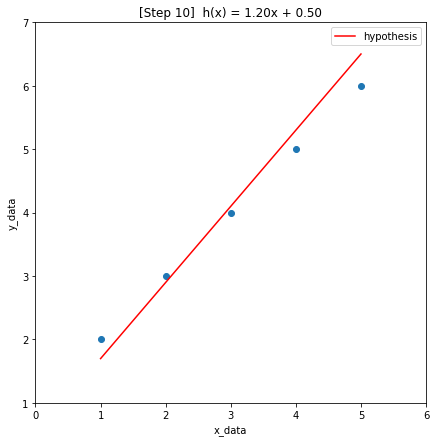

1000| 1.01| 0.98| 0.00


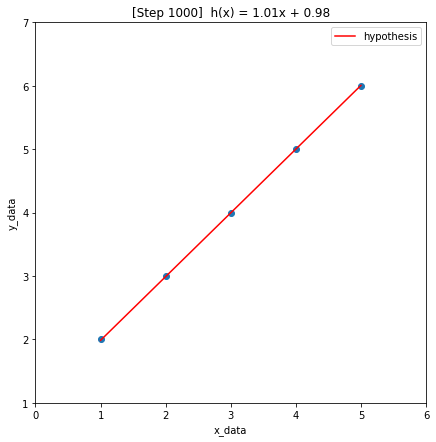

1100| 1.00| 0.99| 0.00


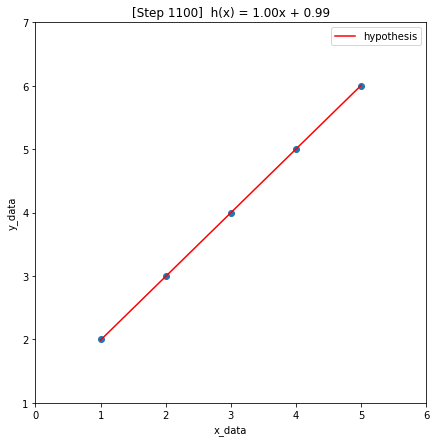

In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf

# y = ax + b에서 a, b 찾기

# 실제 data ( y = 1x+1)
x_data = [1, 2, 3, 4, 5]
y_data = [2, 3, 4, 5, 6]

# weight와 bias 초기설정
w = tf.Variable(2.0)
b = tf.Variable(0.7)
learn_rate = 0.01

print(f'step|    w|    b| cost')
print(f'----|-----|-----|-----')

for i in range(1, 1101): 
    with tf.GradientTape() as tape:              # Gradient Tape(이전 연산 과정 tape에 차곡차곡 기록)
        hypothesis = w * x_data + b              # 가설 설정
        cost = tf.reduce_mean((hypothesis - y_data)**2) # MSE 오차계산, =tf.losses.mean_squared_error(y, y_hat)

    dw, db = tape.gradient(cost, [w, b])  # cost를 w와 b에 대해 미분 
    w.assign_sub(learn_rate * dw) # w = w - lr*dw
    b.assign_sub(learn_rate * db) # b = b - lr*db
    
    if i in [1, 3, 5, 10, 1000, 1100]:
        print(f"{i:4d}| {w.numpy():.2f}| {b.numpy():.2f}| {cost:.2f}")
        plt.figure(figsize=(7, 7))
        plt.title(f'[Step {i:d}]  h(x) = { w.numpy():.2f}x + {b.numpy():.2f}')
        plt.plot(x_data, y_data, 'o') 
        plt.plot(x_data, w * x_data + b, 'r', label='hypothesis') 
        plt.xlabel('x_data')
        plt.ylabel('y_data')
        plt.xlim(0, 6)
        plt.ylim(1, 7)
        plt.legend(loc='best')
        plt.show()

# 주가딥러닝

In [3]:
!pip install pykrx

     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 256kB 34.1MB/s 


In [4]:
from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = stock.get_market_ohlcv_by_date("20160104", "2021054", "005930")
dfx=df[['시가','고가','저가','거래량','종가']]
dfx.tail(3)
data=dfx

In [5]:
#데이터정규화

import numpy as np

numer=data-np.min(data,0)  # 옵션값 0은 열단위에서 구하는 최소값, 1은 행단위에서 구하는 최소값 
deno=np.max(data,0)-np.min(data,0)

dfx1=numer/(deno+1e-7)          # 오류 cover위해 분모에 작은 수 추가

dfx1

,시가,고가,저가,거래량,종가
날짜,,,,,
2016-01-04,0.279070,0.260331,0.269274,0.003399,0.023072
2016-01-05,0.266224,0.251653,0.265028,0.002392,0.023949
2016-01-06,0.267553,0.249587,0.261006,0.004061,0.014311
2016-01-07,0.258250,0.244421,0.257207,0.003127,0.010806
2016-01-08,0.257586,0.245041,0.259888,0.002854,0.013143
...,...,...,...,...,...
2021-04-28,0.921373,0.859504,0.917318,0.172710,0.870035
2021-04-29,0.912514,0.852273,0.910615,0.221480,0.864194
2021-04-30,0.906977,0.848140,0.910615,0.206777,0.861273


In [6]:
dfy1=dfx1['종가']           # dfy1에 종가데이터만 입력
                          
x = dfx1.values.tolist()       # 텐서플로우작업은 모두 values로 변경해야함 (numpy array로 변경)
y = dfy1.values.tolist()

In [7]:
dfx1.values[:,[1,2]][:10]

array([[0.26033058, 0.26927374],
       [0.25165289, 0.26502793],
       [0.24958678, 0.26100559],
       [0.24442149, 0.2572067 ],
       [0.24504132, 0.25988827],
       [0.24090909, 0.25608939],
       [0.24090909, 0.25564246],
       [0.23946281, 0.25653631],
       [0.23595041, 0.25273743],
       [0.23801653, 0.25117318]])

In [8]:
print(x[0:]) 
print(y[0])   # 종가자료만

[[0.27906976744155143, 0.26033057851212776, 0.2692737430164589, 0.00339887048922467, 0.023072429906508363], [0.2662236987815435, 0.2516528925617235, 0.26502793296059773, 0.002391885108811546, 0.02394859813080615], [0.2675526024360271, 0.2495867768592463, 0.26100558659188716, 0.004061206134326776, 0.014310747663530504], [0.258250276854642, 0.2444214876030533, 0.25720670391032713, 0.0031270064726580072, 0.01080607476633936], [0.25758582502740024, 0.24504132231379644, 0.2598882681561342, 0.00285432302155809, 0.01314252336446679], [0.2560354374305027, 0.24090909090884202, 0.2560893854745742, 0.0026717662956765374, 0.007593457943914145], [0.2542635658911913, 0.24090909090884202, 0.25564245810027303, 0.0022842623489642325, 0.005841121495318573], [0.25537098560326094, 0.239462809917108, 0.2565363128488754, 0.0015870010752420604, 0.006425233644850431], [0.2504983388701545, 0.23595041322289675, 0.25273743016731537, 0.0023145925001342906, 0.0035046728971911438], [0.25249169435187985, 0.238016528

In [9]:
data_x=[]; data_y=[]
win_size=10
len(y) # 종가 개수

1311

In [10]:
for i in range(len(y)-win_size):            # 1311-10=1301 (0 부터 1300까지)
  _x=x[i:i+win_size]  # 다음 날 종가 포함 X(window 10)
  _y=y[i+win_size]    # 다음 날 종가 포함 O(window 10 다음 날 종가) 
  data_x.append(_x) ; data_y.append(_y)

In [11]:
x[0:10]

[[0.27906976744155143,
  0.26033057851212776,
  0.2692737430164589,
  0.00339887048922467,
  0.023072429906508363],
 [0.2662236987815435,
  0.2516528925617235,
  0.26502793296059773,
  0.002391885108811546,
  0.02394859813080615],
 [0.2675526024360271,
  0.2495867768592463,
  0.26100558659188716,
  0.004061206134326776,
  0.014310747663530504],
 [0.258250276854642,
  0.2444214876030533,
  0.25720670391032713,
  0.0031270064726580072,
  0.01080607476633936],
 [0.25758582502740024,
  0.24504132231379644,
  0.2598882681561342,
  0.00285432302155809,
  0.01314252336446679],
 [0.2560354374305027,
  0.24090909090884202,
  0.2560893854745742,
  0.0026717662956765374,
  0.007593457943914145],
 [0.2542635658911913,
  0.24090909090884202,
  0.25564245810027303,
  0.0022842623489642325,
  0.005841121495318573],
 [0.25537098560326094,
  0.239462809917108,
  0.2565363128488754,
  0.0015870010752420604,
  0.006425233644850431],
 [0.2504983388701545,
  0.23595041322289675,
  0.25273743016731537,
  0.

In [12]:
#훈련용 데이터 테스트데이터
train_size=int(len(data_y)*0.7)
trainX=np.array(data_x[0:train_size])
trainY=np.array(data_y[0:train_size])

test_size=int(len(data_y)-train_size)
testX=np.array(data_x[test_size:len(data_x)])
testY=np.array(data_y[test_size:len(data_y)])

In [13]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(win_size, 5)))   
# input_shape값의 10, 5는 10일간의 자료와 시가,고가,저가,거래량,종가의 5개자료
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(trainX, trainY, epochs=50, batch_size=30)
pred_y = model.predict(testX)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10, 10)            640       
_________________________________________________________________
dropout (Dropout)            (None, 10, 10)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
31/31 [==============================] - 3s 8ms/step - loss: 0.0607
Epoch 2/50
31/31 [=======================

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


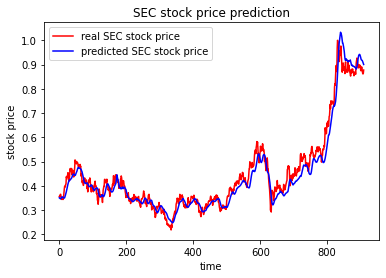

In [14]:
# Visualising the results
import matplotlib.pyplot as plt

plt.figure()
plt.plot(testY, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [15]:
print("Tomorrow's SEC price(y) :", df['종가'].iloc[-1] * pred_y[-1] / dfx1.종가.iloc[-1], 'KRW')

Tomorrow's SEC price(y) : [84772.65653089] KRW


In [16]:
# raw_df.close[-1] : dfy.close[-1] = y : pred_y[-1]
print("Tomorrow's SEC price :", df['종가'].iloc[-1] * pred_y[-1] / dfy1[-1:], 'KRW')

Tomorrow's SEC price : 날짜
2021-05-04    84772.656531
Name: 종가, dtype: float64 KRW


In [17]:
df['종가'].iloc[-1]

82600

In [18]:
dfy1[-1:]

날짜
2021-05-04    0.877336
Name: 종가, dtype: float64

# 교재코드
### 데이터 불러오기

In [28]:
raw_df = stock.get_market_ohlcv_by_date("20190504", "20210514", "005930")
dfx=raw_df[['시가','고가','저가','거래량','종가']]
dfx.tail(3)
data=dfx


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
# from Investar import Analyzer


# raw_df = mk.get_daily_price('삼성전자', '2018-05-04', '2020-01-22')

window_size = 10 
data_size = 5

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

# dfx = raw_df[['open','high','low','volume', 'close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []

for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

[[0.8387755102023698, 0.7388127853867784, 0.83556012332819, 0.18154256421499085, 0.8132530120465598], [0.8285714285697376, 0.7315068493137324, 0.83556012332819, 0.16608527117795088, 0.8092369477895397], [0.8102040816309996, 0.736986301368517, 0.8252826310363304, 0.13159314998806848, 0.8132530120465598], [0.8285714285697376, 0.7406392694050399, 0.8417266187033058, 0.09459898123445107, 0.83132530120315], [0.8244897959166847, 0.7351598173502554, 0.8396711202449338, 0.1471598614038524, 0.8253012048176198], [0.8265306122432111, 0.7315068493137324, 0.83556012332819, 0.1134853454460102, 0.8172690763035798], [0.8367346938758434, 0.7570776255693935, 0.8417266187033058, 0.1743720340826548, 0.8433734939742101], [0.8408163265288963, 0.7406392694050399, 0.8273381294947023, 0.2862660109216279, 0.8032128514040096], [0.8061224489779467, 0.7150684931493788, 0.8006166495358672, 0.3656096207893565, 0.7791164658618893], [0.7673469387739442, 0.6858447488571948, 0.7718396711186601, 0.31529309212752715, 0.74

### 모델돌리기

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 10, 10)            640       
_________________________________________________________________
dropout_8 (Dropout)          (None, 10, 10)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/60
12/12 [==============================] - 2s 8ms/step - loss: 0.0396
Epoch 2/60
12/12 [=====================

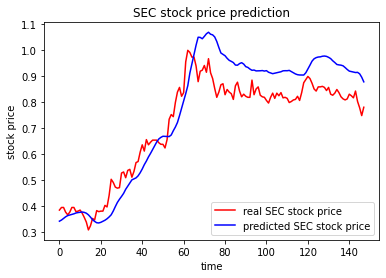

In [29]:
# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

In [30]:
# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df['종가'].iloc[-1] * pred_y[-1] / dfy[-1:], 'KRW')

Tomorrow's SEC price :                       종가
날짜                      
2021-05-14  90121.043354 KRW


In [22]:
raw_df['종가'].iloc[-1] * pred_y[-1] / dfy[-1:]

,종가
날짜,
2020-01-22,66355.704729


# 다른기간

[[0.8599810785224976, 0.7668918918905965, 0.8651471984788885, 0.11092263406999359, 0.8394024276361542], [0.8410596026474152, 0.7652027027014101, 0.8499525166175689, 0.15597909448893402, 0.8468720821646183], [0.8599810785224976, 0.7753378378365281, 0.8689458689442185, 0.1290273885412751, 0.8599439775894305], [0.8656575212850224, 0.7719594594581555, 0.8670465337115536, 0.09936015335848986, 0.8487394957967344], [0.8656575212850224, 0.7702702702689691, 0.8594491927808937, 0.1302709443063361, 0.8338001867398062], [0.8505203405849564, 0.7584459459446647, 0.8480531813849039, 0.18154256421499085, 0.826330532211342], [0.8410596026474152, 0.7516891891879194, 0.8480531813849039, 0.16608527117795088, 0.82259570494711], [0.824030274359841, 0.7567567567554785, 0.8385565052215792, 0.13159314998806848, 0.826330532211342], [0.8410596026474152, 0.7601351351338511, 0.8537511870828989, 0.09459898123445107, 0.8431372549003863], [0.8372753074723988, 0.7550675675662921, 0.8518518518502339, 0.1471598614038524

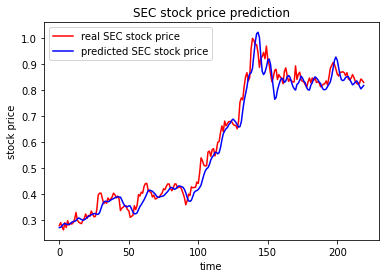

Tomorrow's SEC price :                       종가
날짜                      
2021-05-07  80680.997576 KRW


In [23]:
raw_df = stock.get_market_ohlcv_by_date("20180504", "20210507", "005930")
dfx=raw_df[['시가','고가','저가','거래량','종가']]
dfx.tail(3)
data=dfx


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
import numpy as np
import matplotlib.pyplot as plt
# from Investar import Analyzer


# raw_df = mk.get_daily_price('삼성전자', '2018-05-04', '2021-05-10')

window_size = 10 
data_size = 5

def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

# dfx = raw_df[['open','high','low','volume', 'close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['종가']]

x = dfx.values.tolist()
y = dfy.values.tolist()

data_x = []
data_y = []

for i in range(len(y) - window_size):
    _x = x[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_x.append(_x)
    data_y.append(_y)
print(_x, "->", _y)

train_size = int(len(data_y) * 0.7)
train_x = np.array(data_x[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_x = np.array(data_x[train_size : len(data_x)])
test_y = np.array(data_y[train_size : len(data_y)])

# 모델 생성
model = Sequential()
model.add(LSTM(units=10, activation='relu', return_sequences=True, input_shape=(window_size, data_size)))
model.add(Dropout(0.1))
model.add(LSTM(units=10, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_x, train_y, epochs=60, batch_size=30)
pred_y = model.predict(test_x)

# Visualising the results
plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df['종가'].iloc[-1] * pred_y[-1] / dfy[-1:], 'KRW')

In [24]:
# raw_df.close[-1] : dfy.close[-1] = x : pred_y[-1]
print("Tomorrow's SEC price :", raw_df['종가'].iloc[-1] * pred_y[-1] / dfy[-1:], 'KRW')

Tomorrow's SEC price :                       종가
날짜                      
2021-05-07  80680.997576 KRW
